# Consumer Finance Company - Risk Analysis

------------

*Authors: Pranay Iyer & Prasanth Amarala*

Problem Statement [ Simplified ]

After receiving a loan application analyse the risk as,
* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

**Required Imports & Reading Dataset**

In [2]:
# Necessay imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
# creating a dataframe
# Note - python code and csv file should be in the same folder
df = pd.read_csv('loan.csv', low_memory=False)

In [10]:
# Check the shape of dataframe (rows x columns)
df.shape

(39717, 111)

In [12]:
# view dataframe
# First 10 rows of the data set
df.head(10)

# Data is inconsistent - Missing Values, Invalid Values, various datatypes
# Need for data cleaning, filtering & standardizing

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [14]:
# Count of missing Values in the dataframe columns
df.isnull().sum().sort_values(ascending=False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [16]:
# duplicate values
df.duplicated().sum()

# No duplicates

0

In [18]:
# unique values #total row count - 39717
df.nunique().sort_index(ascending=True)

acc_now_delinq                        1
acc_open_past_24mths                  0
addr_state                           50
all_util                              0
annual_inc                         5318
annual_inc_joint                      0
application_type                      1
avg_cur_bal                           0
bc_open_to_buy                        0
bc_util                               0
chargeoff_within_12_mths              1
collection_recovery_fee            2616
collections_12_mths_ex_med            1
delinq_2yrs                          11
delinq_amnt                           1
desc                              26526
dti                                2868
dti_joint                             0
earliest_cr_line                    526
emp_length                           11
emp_title                         28820
funded_amnt                        1041
funded_amnt_inv                    8205
grade                                 7
home_ownership                        5


In [20]:
# Multiple columns has all values as null
# 54 Columns has all values as null - we can potentially remove these columns
# Rest data
"""
mths_since_last_record	36931
mths_since_last_delinq	25682
desc	12942
emp_title	2459
emp_length	1075
pub_rec_bankruptcies	697
last_pymnt_d	71
collections_12_mths_ex_med	56
chargeoff_within_12_mths	56
revol_util	50
tax_liens	39
title	11
last_credit_pull_d	2
"""

'\nmths_since_last_record\t36931\nmths_since_last_delinq\t25682\ndesc\t12942\nemp_title\t2459\nemp_length\t1075\npub_rec_bankruptcies\t697\nlast_pymnt_d\t71\ncollections_12_mths_ex_med\t56\nchargeoff_within_12_mths\t56\nrevol_util\t50\ntax_liens\t39\ntitle\t11\nlast_credit_pull_d\t2\n'

In [22]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [24]:
# As multiple columns has null values and will not be impactful for the analysis
# keeping columns which does not have null values more than 19858
# df.shape gives rows = 39717; 39717/2 = 19858 
df_updated = df.loc[:,df.isnull().sum()<19858]

In [26]:
df_updated.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [28]:
# Checking columns in the updated dataframe
df_updated.columns

#len(df_updated.columns)
# Columns remaining = 54

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [30]:
# Basics checks - missing values
df_updated.isnull().sum(axis=1).sort_values(ascending=False)

# A row has a maximum of 6 values missing, which should not a large impact on analysis, can proceed with these columns

39715    6
39714    6
39710    5
39700    5
39704    5
39706    5
39709    5
39676    5
39659    5
39660    5
39688    4
39687    4
39686    4
39685    4
39689    4
39650    4
39716    4
39674    4
39682    4
11282    4
39691    4
4714     4
39672    4
39671    4
39642    4
39690    4
39692    4
39701    4
14839    4
39705    4
39703    4
39702    4
39711    4
39693    4
39712    4
39713    4
39707    4
39708    4
39699    4
39698    4
39697    4
39696    4
39695    4
39694    4
25410    3
4212     3
25479    3
25478    3
25487    3
4084     3
25587    3
25612    3
4203     3
4435     3
25228    3
4245     3
4272     3
25146    3
4292     3
25083    3
25072    3
24984    3
4351     3
4391     3
24854    3
24847    3
24793    3
4044     3
3699     3
25652    3
3772     3
26695    3
26639    3
26569    3
3604     3
26525    3
3634     3
3677     3
26383    3
3687     3
24706    3
26265    3
26189    3
3978     3
26166    3
3801     3
3839     3
26034    3
26025    3
3860     3
25989    3

Checking meaning of all the remaining columns

In [309]:
# LOAD Data Dictionary
df_dict = pd.read_excel('Data_Dictionary.xlsx')

In [311]:
df_dict.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [313]:
df_updated.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [315]:
df_dict[df_dict['LoanStatNew'].isin(df_updated.columns)][['LoanStatNew', 'Description']].sort_values(by='LoanStatNew',ascending=True)
# df_dict[df_dict['LoanStatNew'].isin(df_updated.columns)][['LoanStatNew', 'Description']].sort_values(by='LoanStatNew',ascending=True).to_excel('variables_used.xlsx', index=0)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
2,addr_state,The state provided by the borrower in the loan...
4,annual_inc,The self-reported annual income provided by th...
6,application_type,Indicates whether the loan is an individual ap...
10,chargeoff_within_12_mths,Number of charge-offs within 12 months
11,collection_recovery_fee,post charge off collection fee
12,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
13,delinq_2yrs,The number of 30+ days past-due incidences of ...
14,delinq_amnt,The past-due amount owed for the accounts on w...
15,desc,Loan description provided by the borrower


In [40]:
# Dropping columns 
# Personal variables -  inq_last_6mths, ope_acc, pub_rec, etc.. this tells behaviour
# Zip_code, title, emp_title, url, desc, etc.. these are random variables does have an effect on the analysis
# funded_amnt_inv - amount committed by investors, removing that
# These variables are not available at the time of decision making i.e. while accepting loan requests 
df_final =  df_updated.drop(columns=['zip_code',
 'url',
 'total_rec_prncp',
 'total_rec_late_fee',
 'total_rec_int',
 'total_pymnt_inv',
 'total_pymnt',
 'total_acc',
 'title',
 'revol_util',
 'revol_bal',
 'recoveries',
 'pub_rec',
 'out_prncp_inv',
 'out_prncp',
 'open_acc',
 'member_id',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'inq_last_6mths',
 'funded_amnt_inv',
 'emp_title',
 'earliest_cr_line',
 'desc',
 'delinq_2yrs',
 'collection_recovery_fee',
 'application_type'])

In [42]:
# remaining columns 
df_final.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [44]:
# Again, checking null values, uniques values, duplicates to make correct data decisions
df_final.isnull().sum().sort_values(ascending=False)

emp_length                    1075
pub_rec_bankruptcies           697
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
tax_liens                       39
pymnt_plan                       0
delinq_amnt                      0
acc_now_delinq                   0
policy_code                      0
initial_list_status              0
dti                              0
addr_state                       0
purpose                          0
id                               0
loan_amnt                        0
issue_d                          0
verification_status              0
annual_inc                       0
home_ownership                   0
sub_grade                        0
grade                            0
installment                      0
int_rate                         0
term                             0
funded_amnt                      0
loan_status                      0
dtype: int64

In [46]:
df_final.nunique().sort_values(ascending=False)

id                            39717
installment                   15383
annual_inc                     5318
dti                            2868
funded_amnt                    1041
loan_amnt                       885
int_rate                        371
issue_d                          55
addr_state                       50
sub_grade                        35
purpose                          14
emp_length                       11
grade                             7
home_ownership                    5
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
term                              2
pymnt_plan                        1
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
tax_liens                         1
dtype: int64

In [48]:
# dropping columns with just 1 uniques value
df_final = df_final.drop(columns=['tax_liens','delinq_amnt','chargeoff_within_12_mths',
                                  'acc_now_delinq','policy_code','collections_12_mths_ex_med',
                                  'initial_list_status','pymnt_plan'])

In [50]:
df_final.columns
# These columns looks good enough to proceed with analysis

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [52]:
df_final.isnull().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64

In [54]:
# employee length uniques values
df_final['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [56]:
# Remove rows that has null values for emp_length, as we might not be able to fix it
df_final = df_final.dropna(subset=['emp_length'])
# there is a potential change in the shape of the dataframe

In [58]:
df_final.shape

(38642, 18)

In [60]:
df_final['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64

In [62]:
# As maximum values in 'pub_rec_bankruptcies' is 0 we can replace 697 null values by 0 and get the expected outcome from analysis
df_final.fillna(0,inplace=True) 

In [64]:
df_final.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,1075358,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


In [66]:
df_final['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [68]:
# Basic checks
# Null check
df_final.isnull().sum()

# No null values, dataset looks good.

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [70]:
#duplicate values
df_final.duplicated().sum()

# No duplicates found

0

In [72]:
# Final shape of the dataframe
df_final.shape

(38642, 18)

In [74]:
# Deepdive in Data types
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [76]:
df_final.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,1075358,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


# Data Cleaning

In [78]:
# removing string 'months' from the term as we just need numeric value
df_final['term'] = df_final['term'].apply(lambda x: int(x.replace(' months','')))

In [80]:
# Removing % sign from interest rate
df_final['int_rate'] = df_final['int_rate'].apply(lambda x: str(x.replace('%','')))
# coverting string to float
df_final['int_rate'] = df_final['int_rate'].astype(float)
# round the value as we are do not need continous value at the moment
df_final[['int_rate','installment']] = df_final[['int_rate','installment']].round()
# convert values to int
df_final[['int_rate','installment']] = df_final[['int_rate','installment']].astype('int64')

In [82]:
# emp length, removing all unnecessary strings
df_final['emp_length'] = df_final['emp_length'].apply(lambda x:str(x).replace(' years',''))
df_final['emp_length'] = df_final['emp_length'].apply(lambda x:str(x).replace(' year',''))
df_final['emp_length'] = df_final['emp_length'].apply(lambda x:str(x).replace('+',''))
df_final['emp_length'] = df_final['emp_length'].apply(lambda x:str(x).replace('<',''))
# .strip() will remove all the blank spaces
df_final['emp_length'] = df_final['emp_length'].apply(lambda x:str(x).strip())
# convert to int
df_final['emp_length'] = df_final['emp_length'].astype('int64')

In [84]:
# round & convert to int
df_final['dti'] = df_final['dti'].round().astype('int64')
df_final[['pub_rec_bankruptcies','annual_inc']] = df_final[['pub_rec_bankruptcies','annual_inc']].round().astype('int64')

In [86]:
# convert to date & time
df_final['issue_d'] = pd.to_datetime(df_final.issue_d,format='%b-%y')

In [88]:
# create a new column with just year & month, as we do not have the exact issue day in the dataset
df_final['issue_yr'] = pd.to_datetime(df_final.issue_d,format='%b-%y').dt.year
df_final['issue_mth'] = pd.to_datetime(df_final.issue_d,format='%b-%y').dt.month

In [90]:
# checking all the date cleaning manipulation
df_final.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_yr,issue_mth
0,1077501,5000,5000,36,11,163,B,B2,10,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,AZ,28,0,2011,12
1,1077430,2500,2500,60,15,60,C,C4,1,RENT,30000,Source Verified,2011-12-01,Charged Off,car,GA,1,0,2011,12
2,1077175,2400,2400,36,16,84,C,C5,10,RENT,12252,Not Verified,2011-12-01,Fully Paid,small_business,IL,9,0,2011,12
3,1076863,10000,10000,36,13,339,C,C1,10,RENT,49200,Source Verified,2011-12-01,Fully Paid,other,CA,20,0,2011,12
4,1075358,3000,3000,60,13,68,B,B5,1,RENT,80000,Source Verified,2011-12-01,Current,other,OR,18,0,2011,12


In [92]:
# checking the datatype
df_final.info()

# Data is ready for univariate analysis
# Here we can see, where is the need for examining potential outliers
# if any other manipulation is required  

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    38642 non-null  int64         
 1   loan_amnt             38642 non-null  int64         
 2   funded_amnt           38642 non-null  int64         
 3   term                  38642 non-null  int64         
 4   int_rate              38642 non-null  int64         
 5   installment           38642 non-null  int64         
 6   grade                 38642 non-null  object        
 7   sub_grade             38642 non-null  object        
 8   emp_length            38642 non-null  int64         
 9   home_ownership        38642 non-null  object        
 10  annual_inc            38642 non-null  int64         
 11  verification_status   38642 non-null  object        
 12  issue_d               38642 non-null  datetime64[ns]
 13  loan_status          

# Outlier Analysis

In [94]:
# Checking if there are any outliers
df_final.describe()

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,pub_rec_bankruptcies,issue_yr,issue_mth
count,3.864200e+04,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,38642.000000,3.864200e+04,38642,38642.000000,38642.000000,38642.000000,38642.000000
mean,6.810404e+05,11291.615988,11017.101211,42.431344,12.042519,326.764764,5.092050,6.960828e+04,2010-10-31 02:15:54.360540416,13.325837,0.040811,2010.318462,7.169841
min,5.473400e+04,500.000000,500.000000,36.000000,5.000000,16.000000,1.000000,4.000000e+03,2007-06-01 00:00:00,0.000000,0.000000,2007.000000,1.000000
25%,5.134350e+05,5500.000000,5500.000000,36.000000,9.000000,168.000000,2.000000,4.140000e+04,2010-05-01 00:00:00,8.000000,0.000000,2010.000000,4.000000
50%,6.627705e+05,10000.000000,9950.000000,36.000000,12.000000,283.000000,4.000000,6.000000e+04,2011-02-01 00:00:00,13.000000,0.000000,2011.000000,7.000000
75%,8.364912e+05,15000.000000,15000.000000,60.000000,15.000000,434.000000,9.000000,8.320000e+04,2011-08-01 00:00:00,19.000000,0.000000,2011.000000,10.000000
max,1.077501e+06,35000.000000,35000.000000,60.000000,25.000000,1305.000000,10.000000,6.000000e+06,2011-12-01 00:00:00,30.000000,2.000000,2011.000000,12.000000
std,2.113045e+05,7462.136215,7193.038828,10.629816,3.708579,209.140175,3.408338,6.425320e+04,NaN,6.678280,0.198767,0.884099,3.398920


In [96]:
# As the business case has a requirement of performing analysis to understand who are potential defaulter, removing all the rows as loan status as current
df_final = df_final[df_final['loan_status']!='Current']

In [98]:
df_final.loan_status.value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Name: count, dtype: int64

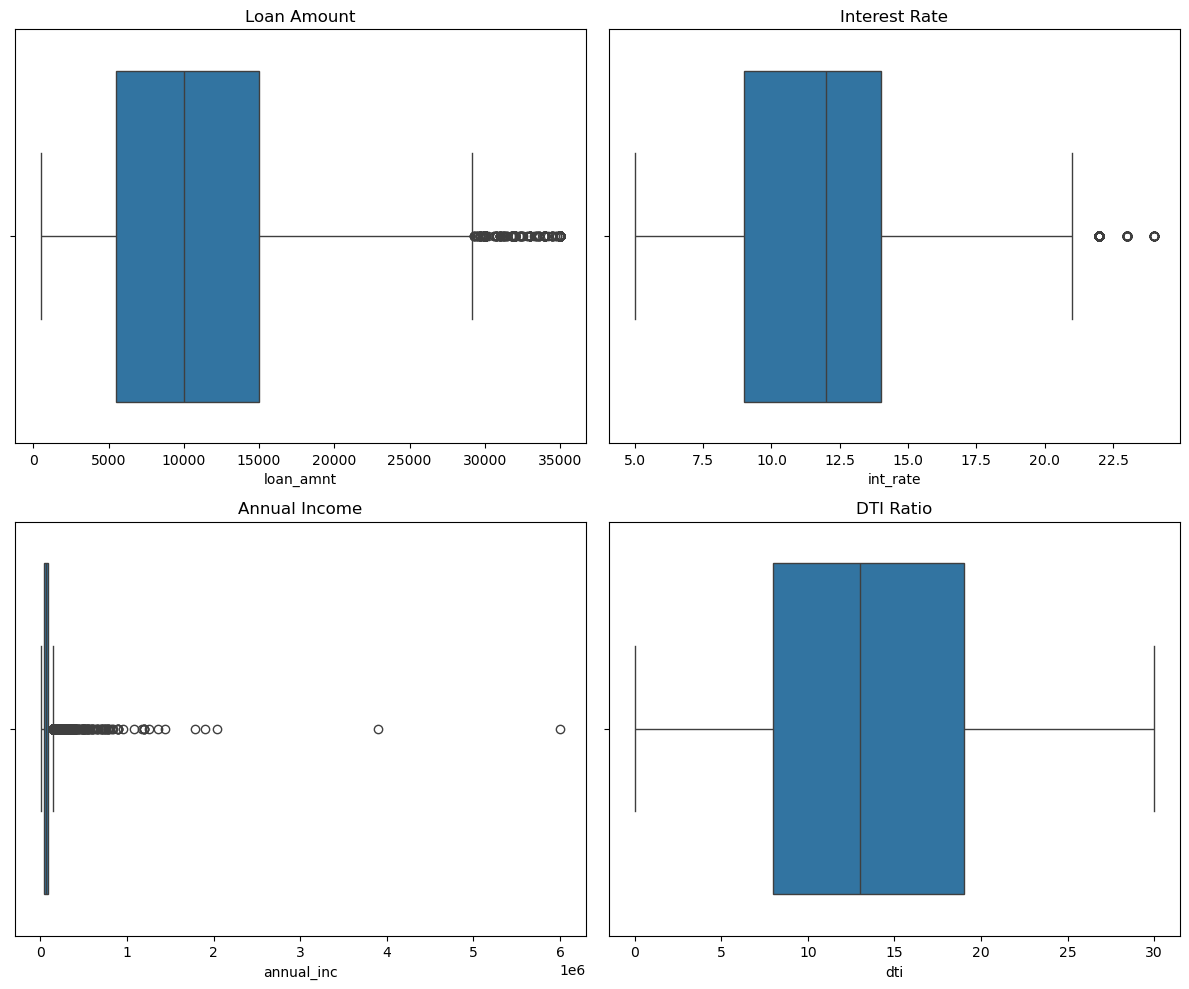

In [100]:
# Box plots for outlier detection
#subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# No potential removeable outliers here, Range looks good
sns.boxplot(data=df_final, x='loan_amnt', ax=ax[0, 0])
ax[0, 0].set_title('Loan Amount')

# No potential removeable outliers here, Range looks good
sns.boxplot(data=df_final, x='int_rate', ax=ax[0, 1])
ax[0, 1].set_title('Interest Rate')

# Need a further check for outliers, as data looks skewed
# Major imbalance
sns.boxplot(data=df_final, x='annual_inc', ax=ax[1,0])
ax[1,0].set_title('Annual Income')

# No potential removeable outliers here, Range looks good
sns.boxplot(data=df_final, x='dti', ax=ax[1,1])
ax[1,1].set_title('DTI Ratio')

plt.tight_layout()
plt.show()

# Annual Income column has outliers and can be removed. 
# Data points needs to be removed are dots placed past the line edges to indicate outliers.
# Removing all these data points

In [102]:
np.percentile(df_final['annual_inc'],99)

235000.0

In [106]:
df_final = df_final[df['annual_inc']<=235000]

C:\Users\prasa\AppData\Local\Temp\ipykernel_10440\4174524529.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final = df_final[df['annual_inc']<=235000]


<Axes: xlabel='annual_inc'>

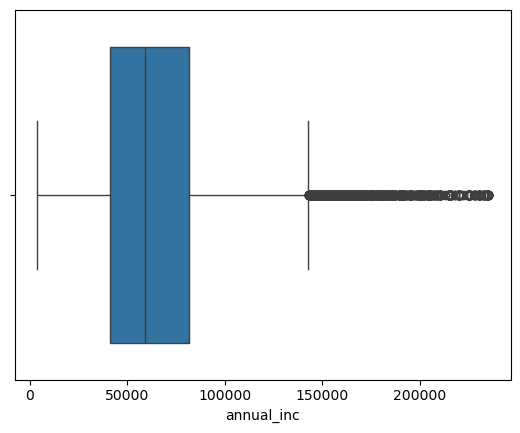

In [108]:
sns.boxplot(data=df_final, x='annual_inc')

# Univariate Analysis

In [111]:
# df for Charged Off data
df_univariate = df_final[df_final['loan_status']!='Fully Paid']

In [113]:
df_univariate.loan_status.value_counts()

loan_status
Charged Off    5360
Name: count, dtype: int64

In [123]:
df_univariate.addr_state.value_counts()

addr_state
CA    1066
FL     475
NY     472
TX     306
NJ     275
GA     209
IL     193
VA     172
PA     168
MD     157
MA     147
OH     144
WA     118
AZ     112
NC     110
MO     106
NV     100
MI      96
CO      90
CT      89
MN      79
OR      69
SC      64
WI      59
LA      52
AL      51
KY      45
OK      40
UT      39
NM      29
HI      28
KS      26
AR      26
RI      25
NH      23
WV      21
DC      15
AK      14
DE      12
SD      11
MT      10
VT       6
WY       3
NE       3
MS       2
TN       2
ID       1
Name: count, dtype: int64

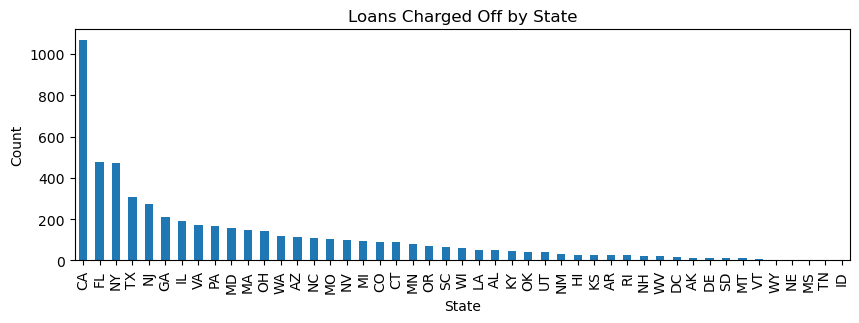

In [289]:
#Understand the most defaulting state
plt.figure(figsize=(10, 3))
df_univariate.addr_state.value_counts().plot.bar()
plt.title('Loans Charged Off by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()
#California has the highest number of Charged Off loans

In [ ]:
#California leads the list of states with the highest number of loan defaults.
#The number of defaults in California is more than double that of the second and third states, Florida and New York.
#The company should exercise caution when lending to borrowers in California.

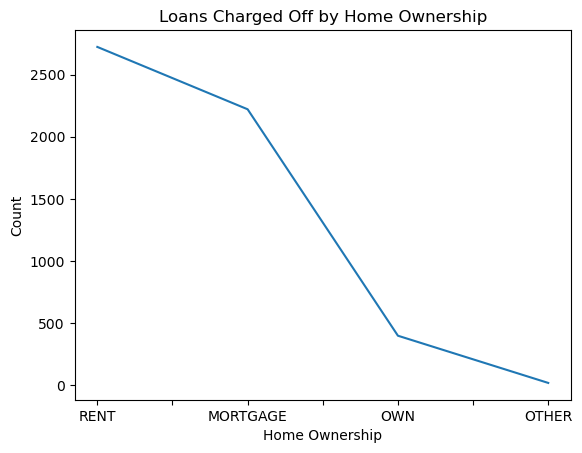

In [291]:
#Understand which category of howmeowners default the most
df_univariate.home_ownership.value_counts().plot()
plt.title('Loans Charged Off by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()
#Result is people on rent tend to default the most

In [ ]:
#Applicants living in rented accommodations are the most likely to default on loans, followed by those with mortgaged homes.
#Applicants who own their homes are significantly less likely to default.

In [299]:
df_univariate.verification_status.value_counts()
# Verified and Source Verified both look to be the same. So the data should be updated 

verification_status
Not Verified       2039
Verified           1936
Source Verified    1385
Name: count, dtype: int64

In [340]:
df_univariate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5360 entries, 1 to 39688
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5360 non-null   int64         
 1   loan_amnt             5360 non-null   int64         
 2   funded_amnt           5360 non-null   int64         
 3   term                  5360 non-null   int64         
 4   int_rate              5360 non-null   int64         
 5   installment           5360 non-null   int64         
 6   grade                 5360 non-null   object        
 7   sub_grade             5360 non-null   object        
 8   emp_length            5360 non-null   int64         
 9   home_ownership        5360 non-null   object        
 10  annual_inc            5360 non-null   int64         
 11  verification_status   5360 non-null   object        
 12  issue_d               5360 non-null   datetime64[ns]
 13  loan_status           

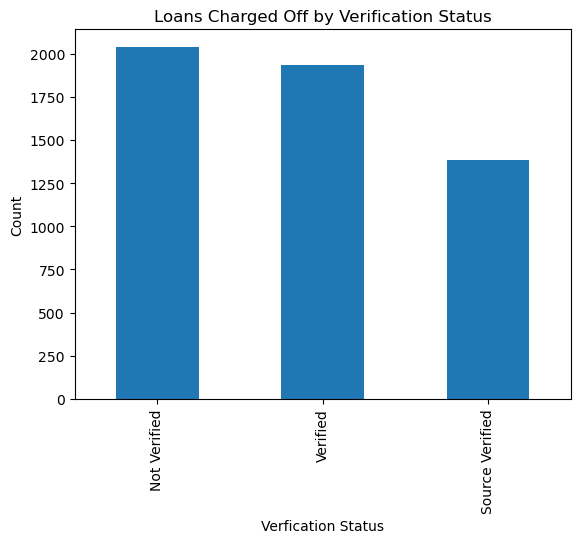

In [297]:
df_univariate.verification_status.value_counts().plot.bar()
plt.title('Loans Charged Off by Verification Status')
plt.xlabel('Verfication Status')
plt.ylabel('Count')
plt.show()

In [ ]:
#Loans granted without income verification are most likely to default, followed closely by loans where income is verified by Lending Club.
#The least risky loans are those where the source of income has been thoroughly verified.

# Bivariate Analysis

In [211]:
df_final.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_yr', 'issue_mth'],
      dtype='object')

In [217]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

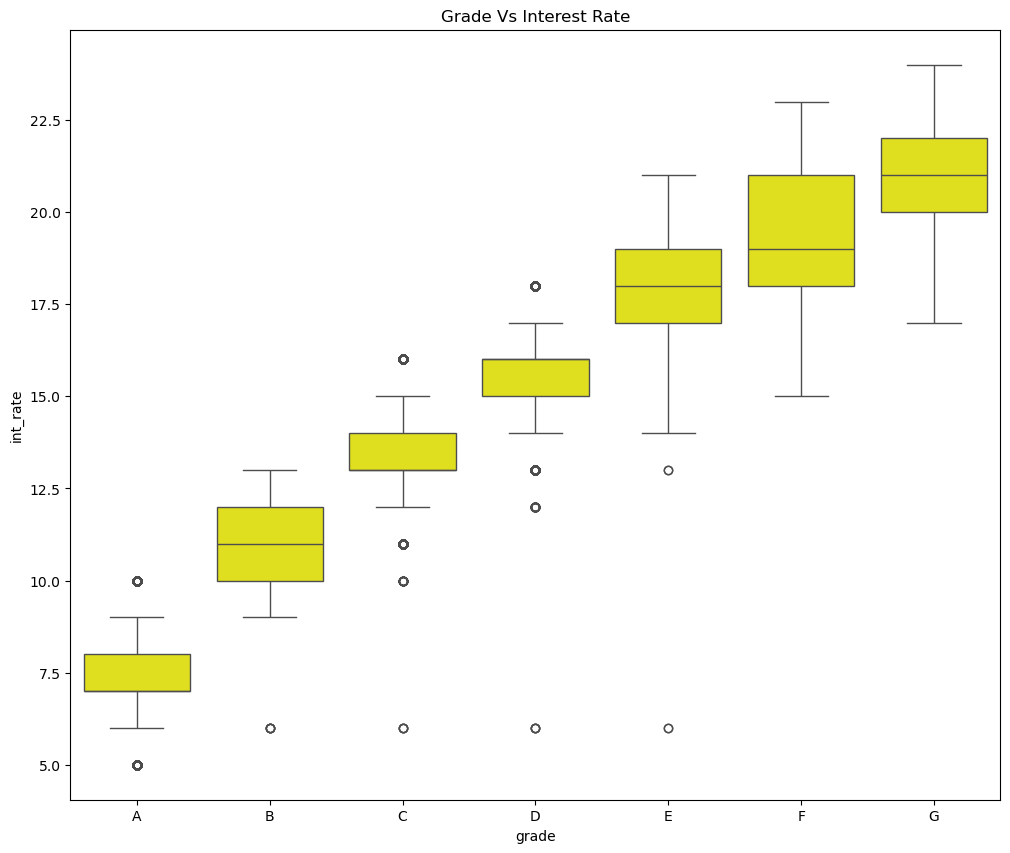

In [219]:
plt.figure(figsize=(12,10))
sns.boxplot(data=df_final, x='grade', y='int_rate', order=sorted(df_final['grade'].unique()), color='yellow')
plt.title('Grade Vs Interest Rate', fontsize=12)
plt.show()

In [326]:
#The box plot shows an upward trend between credit grade (A to G) and interest, adhering to the pattern of lower credit worthiness higher the 
#lending interest rate to minimize the lending companies’ risk of financial loss because of the bad loans.
#This approach helps the lending company recover higher amounts from the very first installment there by mitigating losses in case of loan default.


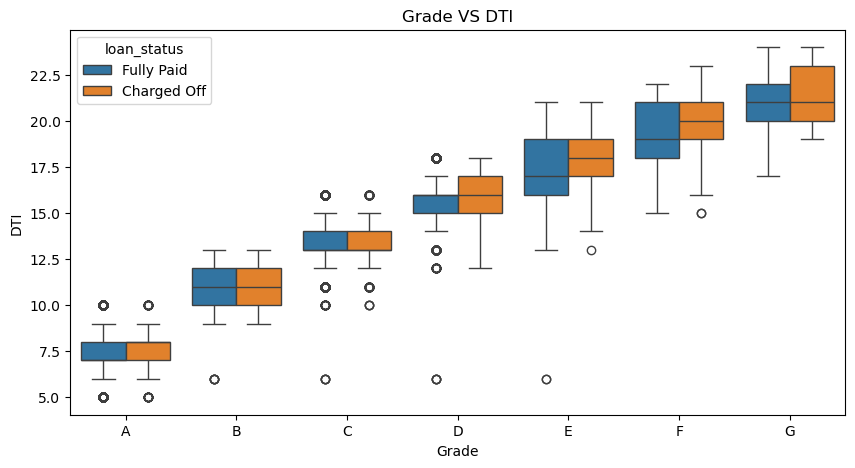

In [221]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_final, x='grade', y='int_rate', order=sorted(df_final['grade'].unique()), hue='loan_status')
plt.xlabel('Grade')
plt.ylabel('DTI')
plt.title('Grade VS DTI', fontsize=12)
plt.show()

In [ ]:
#The box plot shows that the debt-to-income (DTI) increases as the loan grade decreases from A to G, with lower grades having a higher DTI that indicates greater risk. 
#The defaults for grade G are higher as compared to paid-off indicating that higher the DTI tougher to payback the loan.

In [243]:
stacked_data = df_final.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)


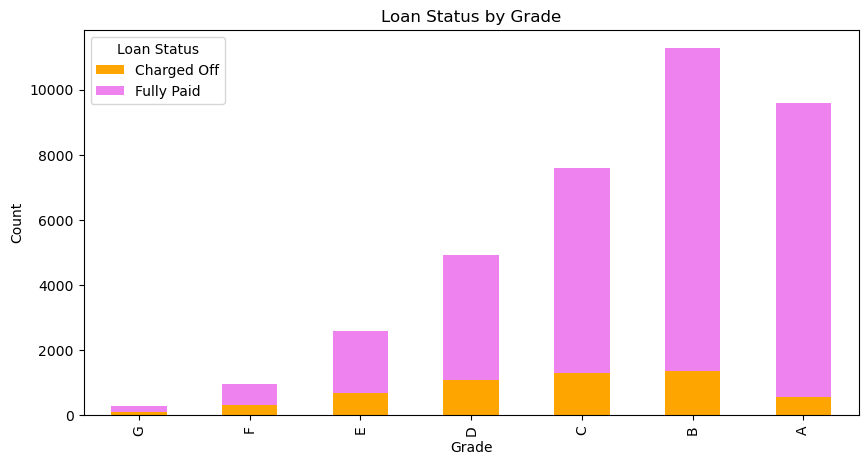

In [344]:
order=['G','F','E','D','C','B','A',]
stacked_data = stacked_data.reindex(order)
stacked_data
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 5), color=['orange', 'violet'])
plt.title('Loan Status by Grade', fontsize=12)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [ ]:
#The percentage of applicants defaulting increases as the credit score/grade decreases. 
#Also, we could see that number of loans given are more to applicants with better grade, reinforcing the importance of adherence to good grades while granting loans to ensure better business and minimal losses to the lending firm.

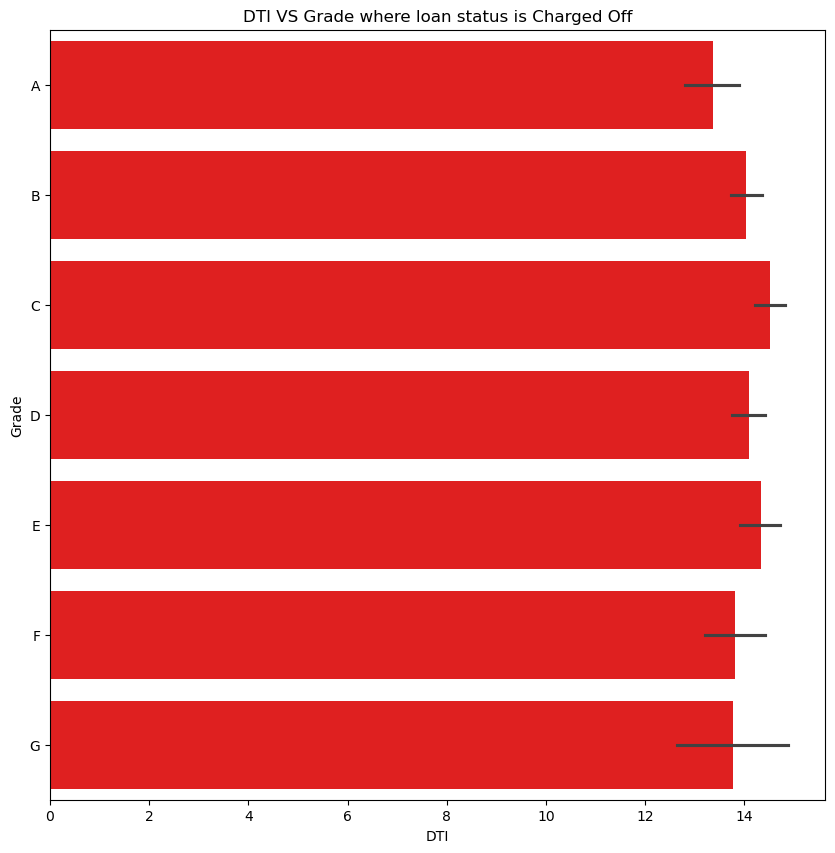

In [185]:
plt.figure(figsize=(10,10))
sns.barplot(data=df[df['loan_status']!='Fully Paid'],x='dti',y='grade',color='Red',order=['A','B','C','D','E','F','G'])
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('DTI VS Grade where loan status is Charged Off',fontsize=12)
plt.show()

In [ ]:
# Irrespective of the Grade, if the DTI is higher possibility of defaulting exist due to the crunch of funds for loan repayment. 